# Preparation

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('patient_data_222.csv')

Nombre de patient unique :  20007
Nombre de patients avec des moments de failure: 10957
Nombre de patients sans moments de failure: 9050


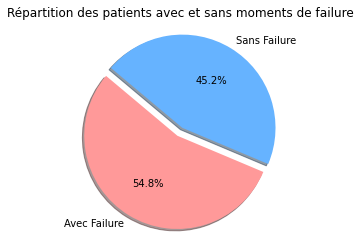

In [3]:
# afficher le nombre de patient unique
print("Nombre de patient unique : ", data['patientid'].nunique())
# Compter le nombre de patients
total_patients = data['patientid'].nunique()

# Trouver les patients avec des moments de failure
failure_patients = data[data['class'] == 'Failure']['patientid'].unique()

# Calculer le nombre et le pourcentage de patients avec des moments de failure
failure_patients_count = len(failure_patients)
print(f"Nombre de patients avec des moments de failure: {failure_patients_count}")
failure_patients_percentage = (failure_patients_count / total_patients) * 100

# Calculer le nombre et le pourcentage de patients sans moments de failure
non_failure_patients_count = total_patients - failure_patients_count
print(f"Nombre de patients sans moments de failure: {non_failure_patients_count}")
non_failure_patients_percentage = (non_failure_patients_count / total_patients) * 100

# Créer le graphique à secteurs
labels = ['Avec Failure', 'Sans Failure']
sizes = [failure_patients_percentage, non_failure_patients_percentage]
colors = ['#ff9999', '#66b3ff']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Répartition des patients avec et sans moments de failure")

# Afficher le graphique
plt.show()

In [4]:
# trouver les patients qui sont en failure à un moment donné
failure_patients = data[data['class'] == 'Failure']['patientid'].unique()

# trouver tous les patients
all_patients = data['patientid'].unique()

# trouver les patients stables
stable_patients = [patient for patient in all_patients if patient not in failure_patients]

# crée dataset
stable_patients_data = data[data['patientid'].isin(stable_patients)]
failure_patients_data = data[data['patientid'].isin(failure_patients)]

# display
print("Nombre de patient stable : ", stable_patients_data['patientid'].nunique())
print("Nombre de patient en failure : ", len(failure_patients))

Nombre de patient stable :  9050
Nombre de patient en failure :  10957


### entrainement 1% , validation 0.5% test 1% test_balanced 0.5%

In [23]:
# Calcule 1% de patient
total_patients = data['patientid'].nunique()
n_sample = int(0.01 * total_patients)
print("Nombre de patients dans l'échantillon : ", n_sample)

# Calcule patients par classe
n_sample_each_class = n_sample // 2

# Sélection aléatoire des patients
stable_sample = stable_patients_data['patientid'].drop_duplicates().sample(n=n_sample_each_class, random_state=53)
failure_sample = failure_patients_data['patientid'].drop_duplicates().sample(n=n_sample_each_class, random_state=53)

# Récupère les données pour les patients sélectionnés
stable_sample_data = data[data['patientid'].isin(stable_sample)]
failure_sample_data = data[data['patientid'].isin(failure_sample)]

data_train = pd.concat([stable_sample_data, failure_sample_data])

print("Nombre de patients dans train : ", data_train['patientid'].nunique())


Nombre de patients dans l'échantillon :  200
Nombre de patients dans train :  200


In [24]:
#calcul du nombre de données du train set
print("Nombre de données dans train : ", len(data_train))
#calcul du pourcentage de données sur données total
print("Pourcentage de données dans train : ", len(data_train)/len(data)*100)

Nombre de données dans train :  381155
Pourcentage de données dans train :  1.063115931138995


In [25]:
# voir la proportion de failure dans le train set
data_failure = data_train[data_train['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_train : ", len(data_failure)/len(data_train)*100)

Pourcentage de données failure dans data_train :  11.184688643727618


In [26]:
#récupérer les données restantes
data_other = data[ ~data.index.isin(data_train.index)]
# récuprérer data failure
data_failure = data_other[data_other['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data_other)*100)
# récupérer data stable
data_stable = data_other[data_other['class'] == 'Stable']
#calul proportion stable
print("Pourcentage de données stable dans data_other : ", len(data_stable)/len(data_other)*100)

Pourcentage de données failure dans data_other :  11.616013239709556
Pourcentage de données stable dans data_other :  88.38398676029044


In [27]:
#récupérer combien représente 0.5% de données
n_sample = int(0.005 * len(data))
print("Nombre de données dans l'échantillon : ", n_sample)

# # Calcule patients par classe
# n_sample_each_class = n_sample // 2


# #récupérer 0.25% de données aléatoire de data
# data_test_balenced = data_failure.sample(n=n_sample_each_class, random_state=42)

# #récupérer 0.25% de données aléatoire de data
# data_test_balenced = data_test_balenced.append(data_stable.sample(n=n_sample_each_class, random_state=42))

# #calculer le pourcentage de données failure dans data_test_balenced
# print("Pourcentage de données failure dans data_test_balenced : ", len(data_test_balenced[data_test_balenced['class'] == 'Failure'])/len(data_test_balenced)*100)


# #récupérer les données restantes
# data_other = data_other[ ~data_other.index.isin(data_test_balenced.index)]

#récupérer 0.5% des données de manière aléatoire de data_other
data_valid = data_other.sample(n=n_sample, random_state=23)

#récupérer les données restantes
data_other = data_other[ ~data_other.index.isin(data_valid.index)]

#récupérer 1% des données de manière aléatoire de data_other
data_test = data_other.sample(n=n_sample*2, random_state=23)

#récupérer les données restantes
data_other = data_other[ ~data_other.index.isin(data_test.index)]

Nombre de données dans l'échantillon :  179263


In [28]:
#calcul du nombre de données du test set
print("Nombre de données dans test : ", len(data_test))
#calcul du pourcentage de données sur données total
print("Pourcentage de données dans test : ", len(data_test)/len(data)*100)

Nombre de données dans test :  358526
Pourcentage de données dans test :  0.9999992190251716


In [29]:
#calcul du nombre de données du valid set
print("Nombre de données dans valid : ", len(data_valid))
#calcul du pourcentage de données sur données total
print("Pourcentage de données dans valid : ", len(data_valid)/len(data)*100)

Nombre de données dans valid :  179263
Pourcentage de données dans valid :  0.4999996095125858


In [30]:
# compter le nombre de client pour chaque set
print("Nombre de client dans le train set : ", data_train['patientid'].nunique())
print("Nombre de client dans le test set : ", data_test['patientid'].nunique())
# print("Nombre de client dans le test balanced set: ", data_test_balenced['patientid'].nunique())
print("Nombre de client dans le valid set : ", data_valid['patientid'].nunique())
print("Nombre de client dans le other set : ", data_other['patientid'].nunique())

Nombre de client dans le train set :  200
Nombre de client dans le test set :  19226
Nombre de client dans le valid set :  17941
Nombre de client dans le other set :  19807


In [31]:
#nombre de données par set
print("Nombre de données dans le train set : ", len(data_train))
print("Nombre de données dans le test set : ", len(data_test))
# print("Nombre de données dans le test balanced set : ", len(data_test_balenced))
print("Nombre de données dans le valid set : ", len(data_valid))
print("Nombre de données dans le other set : ", len(data_other))

Nombre de données dans le train set :  381155
Nombre de données dans le test set :  358526
Nombre de données dans le valid set :  179263
Nombre de données dans le other set :  34933684


In [32]:
# compter le nombre de client qui font au minimu une failure pour chaque set en pourcentage du set entier
print("Pourcentage de client qui font au moins une failure dans le train set : ", data_train[data_train['class'] == 'Failure']['patientid'].nunique()/data_train['patientid'].nunique()*100)
print("Pourcentage de client qui font au moins une failure dans le test set : ", data_test[data_test['class'] == 'Failure']['patientid'].nunique()/data_test['patientid'].nunique()*100)
# print("Pourcentage de client qui font au moins une failure dans le test balanced set : ", data_test_balenced[data_test_balenced['class'] == 'Failure']['patientid'].nunique()/data_test['patientid'].nunique()*100)
print("Pourcentage de client qui font au moins une failure dans le valid set : ", data_valid[data_valid['class'] == 'Failure']['patientid'].nunique()/data_valid['patientid'].nunique()*100)
print("Pourcentage de client qui font au moins une failure dans le other set : ", data_other[data_other['class'] == 'Failure']['patientid'].nunique()/data_other['patientid'].nunique()*100)


Pourcentage de client qui font au moins une failure dans le train set :  50.0
Pourcentage de client qui font au moins une failure dans le test set :  35.67044627067513
Pourcentage de client qui font au moins une failure dans le valid set :  29.585864778997827
Pourcentage de client qui font au moins une failure dans le other set :  54.81395466249306


In [33]:
# voir la proportion de failure dans le train set

# voir la proportion de failure dans le train set
data_failure = data_train[data_train['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_train : ", len(data_failure)/len(data_train)*100)

# data_failure = data_test_balenced[data_test_balenced['class'] == 'Failure']
# #calul proportion failure
# print("Pourcentage de données failure dans data_test_balenced  : ", len(data_failure)/len(data_test_balenced)*100)

data_failure = data_test[data_test['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_test : ", len(data_failure)/len(data_test)*100)

# voir la proportion de failure dans le train set
data_failure = data_valid[data_valid['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_valid : ", len(data_failure)/len(data_valid)*100)


# voir la proportion de failure dans le data_other set
data_failure = data_other[data_other['class'] == 'Failure']
#calul proportion failure
print("Pourcentage de données failure dans data_other : ", len(data_failure)/len(data_other)*100)

Pourcentage de données failure dans data_train :  11.184688643727618
Pourcentage de données failure dans data_test :  11.667494128738221
Pourcentage de données failure dans data_valid :  11.542259138807227
Pourcentage de données failure dans data_other :  11.6158633598449


In [34]:
#save train, val and test set   
data_train.to_csv('train.csv', index=False)
data_valid.to_csv('val.csv', index=False)
data_test.to_csv('test.csv', index=False)
# data_test_balenced.to_csv('test_balenced.csv', index=False)
data_other.to_csv('data_global.csv', index=False)